## Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en ./data/loan_data.csv. Si abren el archivo verán que al principio (las líneas que empiezan con #) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por scikit-learn.

In [2]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

### Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [3]:
# La url original es ./data/loan_data.csv, pero lo subi sin carpeta

dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



Documentación:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [4]:
# Esto lo utilizo para consultar datos unicamente, e ir viendo que contiene el modelo.
print('Con esto veo las columnas del dataset para irme guiando que información tiene')

dataset.keys()

print('Veo el contenido del dataset')

print(dataset)

print('Para ver el contenido del dataset')

print(dataset.describe())

dir(dataset)

print('Para ver el tipo de dato que nos devuelve la clase')

type(dataset)

print('Para ver los nombres de las caracteristicas')

print(dataset.columns.to_list())

print(dataset['TARGET'])


Con esto veo las columnas del dataset para irme guiando que información tiene
Veo el contenido del dataset
      TARGET   LOAN   MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  \
0          0   4700   88026.0  115506.0   6.0    0.0     0.0  182.248332   
1          0  19300   39926.0  101208.0   4.0    0.0     0.0  140.051638   
2          0   5700   71556.0   79538.0   2.0    0.0     0.0   92.643085   
3          0  13000   44875.0   57713.0   0.0    1.0     0.0  184.990324   
4          0  19300   72752.0  106084.0  11.0    0.0     0.0  193.707100   
...      ...    ...       ...       ...   ...    ...     ...         ...   
1849       1  53400  228236.0  305514.0   6.0    0.0     0.0   11.148069   
1850       1  53600  235895.0  299772.0   5.0    0.0     0.0  112.748282   
1851       1  53600  208197.0  297280.0   4.0    1.0     1.0  160.485251   
1852       1  65500  205156.0  290239.0   2.0    0.0     0.0   98.808206   
1853       1  77400   87651.0  224630.0   9.0    0.0     

In [5]:
print(dataset.head())

   TARGET   LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  \
0       0   4700  88026.0  115506.0   6.0    0.0     0.0  182.248332   0.0   
1       0  19300  39926.0  101208.0   4.0    0.0     0.0  140.051638   0.0   
2       0   5700  71556.0   79538.0   2.0    0.0     0.0   92.643085   0.0   
3       0  13000  44875.0   57713.0   0.0    1.0     0.0  184.990324   1.0   
4       0  19300  72752.0  106084.0  11.0    0.0     0.0  193.707100   1.0   

   CLNO    DEBTINC  
0  27.0  29.209023  
1  14.0  31.545694  
2  15.0  41.210012  
3  12.0  28.602076  
4  13.0  30.686106  


In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TARGET   1854 non-null   int64  
 1   LOAN     1854 non-null   int64  
 2   MORTDUE  1854 non-null   float64
 3   VALUE    1854 non-null   float64
 4   YOJ      1854 non-null   float64
 5   DEROG    1854 non-null   float64
 6   DELINQ   1854 non-null   float64
 7   CLAGE    1854 non-null   float64
 8   NINQ     1854 non-null   float64
 9   CLNO     1854 non-null   float64
 10  DEBTINC  1854 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 159.5 KB
None


### Ejercicio 1: Descripción de los Datos y la Tarea

#### Responder las siguientes preguntas:

**No hace falta escribir código para responder estas preguntas.**

##### ¿De qué se trata el conjunto de datos?

El conjunto de datos Home Equity (HMEQ):

 * Contiene información relacionada con préstamos de capital de vivienda.
 * Contiene información sobre 5,960 préstamos recientes de crédito hipotecario.
 * Se utiliza para construir un modelo de puntuación crediticia que pueda predecir la probabilidad de incumplimiento o dificultades de pago para las líneas de crédito hipotecario.

##### ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

Las variables objetivos para predecir es TARGET, es una variable binaria que indica si un solicitante incumplió o rembolso el prestamo.

TARGET utiliza los valores de 0 y 1 para indicar cada una de las cosas.

##### ¿Qué información (atributos) hay disponible para hacer la predicción?

Para realizar la predicción del objetivo "TARGET" en este conjunto de datos, se dispone de los siguientes atributos:

* **TARGET:** Indicador con dos valores numericos, el 1 es para marcar clientes que no cumplen la devolucion de los prestamos y el 0 indican prestamos reembolsado.
 * **LOAN:** Importe de la solicitud de prestamos.
 * **MORTDUE:** Cantidad adeudada en la hipoteca existente
 * **VALUE:** Valor de propiedad actual.
 * **YOJ:** Años en el trabajo actual.
 * **DEROG:**  Número de informes despectivos importantes
 * **DELINQ:** Número de líneas de crédito morosas
 * **CLAGE:** Antigüedad de la línea comercial más antigua en meses
 * **NINQ:** Número de líneas de crédito recientes
 * **CLNO:** Número de líneas de crédito
 * **DEBTINC:** Relación deuda-ingresos

##### ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

Los atributos que consideramos que pueden ser mas determinantes para la predicción son:

 * **LOAN:** Consideramos que a mayor monto del prestamo, es mayor la posibilidad de incumplimiento.
 * **DELINQ:** Consideramos tambien este atributo ya que contiene las lineas de credito morosas, esto es un indicador importante que da una pauta de un posible incumplimiento del prestamo.

### Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:

https://scikit-learn.org/stable/modules/sgd.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


In [7]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

# Estimación de los parametros optimos
clf.fit(X, y)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [8]:
# Coeficientes encontrados
clf.coef_

array([[-61933.97604441, -15576.97925796, -20490.79754601,
         -1545.42798715,    661.2133606 ,   1022.49488753,
        -31986.88359748,    884.21462655,   1968.05920732,
         10270.55961147]])

In [9]:
clf.intercept_

array([108.6701378])

In [10]:
# Resultados que predice
clf.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:

* Accuracy
* Precision
* Recall
* F1
* matriz de confusión


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [12]:
# Entrenar el clasificador
clf.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [13]:
# En esta parte lo que hago es realizar predicciones sobre los conjuntos de entrenamiento y evaluación
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [14]:
# Calcular las métricas de evaluación para el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Calcular las métricas de evaluación para el conjunto de evaluación
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print("Metricas para el conjunto de entrenamiento 'Exactitud'")
print(f'Train accuracy: {train_accuracy:0.2}')
print(f'Test accuracy: {test_accuracy:0.2}')

Metricas para el conjunto de entrenamiento 'Exactitud'
Train accuracy: 0.83
Test accuracy: 0.84


In [17]:
print("Metricas para el conjunto de entrenamiento 'Precisión'")
print(f'Train precision: {train_precision:0.2}')
print(f'Test precision: {test_precision:0.2}')

Metricas para el conjunto de entrenamiento 'Precisión'
Train precision: 0.0
Test precision: 0.0


In [18]:
print("Metricas para el conjunto de entrenamiento 'Recordar'")
print(f'Train Recall: {train_recall:0.2}')
print(f'Test Recall: {test_recall:0.2}')

Metricas para el conjunto de entrenamiento 'Recordar'
Train Recall: 0.0
Test Recall: 0.0


In [19]:
print("Metricas para el conjunto de entrenamiento 'F1'")
print(f'Train F1: {train_f1:0.2}')
print(f'Test F1: {test_f1:0.2}')

Metricas para el conjunto de entrenamiento 'F1'
Train F1: 0.0
Test F1: 0.0


In [20]:
print("Metricas para el conjunto de entrenamiento 'Matriz de confusión'")
print(f'Train Confusion matrix: {train_confusion_matrix}')
print(f'Test Confusion matrix: {test_confusion_matrix}')

Metricas para el conjunto de entrenamiento 'Matriz de confusión'
Train Confusion matrix: [[1232    0]
 [ 251    0]]
Test Confusion matrix: [[313   0]
 [ 58   0]]


In [22]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print(f"True negative: {tn}")
print(f"False positive: {fp}")
print(f"False negative: {fn}")
print(f"True negative: {fn}")

True negative: 313
False positive: 0
False negative: 58
True negative: 58


In [25]:
# Reporte de clasificación

from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1232
           1       0.00      0.00      0.00       251

    accuracy                           0.83      1483
   macro avg       0.42      0.50      0.45      1483
weighted avg       0.69      0.83      0.75      1483

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.

In [26]:
# Reporte de clasificación con datos de testeo

from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       313
           1       0.00      0.00      0.00        58

    accuracy                           0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:

* Accuracy
* Precision
* Recall
* F1
* matriz de confusión

Documentación:

https://scikit-learn.org/stable/modules/grid_search.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [27]:
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.model_selection import ParameterGrid

# Aca defino los hiperparámetros para Grid Search
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': [0.01, 0.1, 0.2],
    'max_iter': [1000, 2000]
}

for params in ParameterGrid(param_grid):
    print(params)

{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'none'}
{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}
{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}
{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}
{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'none'}
{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l2'}
{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l1'}
{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'elasticnet'}
{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'log', 

In [44]:
# Aqui realizamos Grid Search con validación cruzada
cv = GridSearchCV(clf, param_grid, scoring='accuracy', cv=3)
cv.fit(X_train, y_train)

  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is 

GridSearchCV(cv=3, estimator=SGDClassifier(max_iter=5),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.01, 0.1, 0.2],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['hinge', 'log', 'modified_huber'],
                         'max_iter': [1000, 2000],
                         'penalty': ['none', 'l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [45]:
# Extraemos el mejor parametro con Grid Search
best_params = cv.best_params_

print(f'Mejores hipterparametros')
best_params

Mejores hipterparametros


{'alpha': 0.0001,
 'eta0': 0.01,
 'learning_rate': 'optimal',
 'loss': 'modified_huber',
 'max_iter': 2000,
 'penalty': 'elasticnet'}

In [46]:
best_score = cv.best_score_

print(f"Puntuación media con validación cruzada: {best_score}")

Puntuación media con validación cruzada: 0.831423547213021


In [47]:
best_model = cv.best_estimator_
best_model

SGDClassifier(eta0=0.01, loss='modified_huber', max_iter=2000,
              penalty='elasticnet')

In [48]:
y_train_pred = best_model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
y_test_pred = best_model.predict(X_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [50]:
# Evaluar el mejor modelo en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
confusion_train = confusion_matrix(y_train, y_train_pred)

In [51]:
# Conjunto de testo o evaluación
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

In [52]:
print("Conjunto de entrenamiento 'Exactitud'")
print(f'Train accuracy: {accuracy_train:0.2}')
print(f'Test accuracy: {accuracy_test:0.2}')

Conjunto de entrenamiento 'Exactitud'
Train accuracy: 0.82
Test accuracy: 0.83


In [53]:
print("Conjunto de entrenamiento 'Precisión'")
print(f'Train precision: {precision_train:0.2}')
print(f'Test precision: {precision_test:0.2}')

Conjunto de entrenamiento 'Precisión'
Train precision: 0.19
Test precision: 0.0


In [80]:
print("Conjunto de entrenamiento 'Recordar'")
print(f'Train precision: {recall_train:0.2}')
print(f'Test precision: {recall_test:0.2}')

Conjunto de entrenamiento 'Recordar'
Train precision: 1.0
Test precision: 0.62


In [77]:
print("Conjunto de entrenamiento 'F1'")
print(f'Train F1: {f1_train:0.2}')
print(f'Test F1: {f1_test:0.2}')

Conjunto de entrenamiento 'F1'
Train F1: 1.0
Test F1: 0.63


In [56]:
print("Conjunto de entrenamiento 'Matriz de confusión'")
print(f'Train confusion matriz: {confusion_train}')
print(f'Test confusion matriz: {confusion_test}')

Conjunto de entrenamiento 'Matriz de confusión'
Train confusion matriz: [[1219   13]
 [ 248    3]]
Test confusion matriz: [[309   4]
 [ 58   0]]


### Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:

* https://scikit-learn.org/stable/modules/tree.html
    * https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html


In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [58]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [59]:
# Con esto instalo utils para poder utilizarlo abajo
!pip install utils

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [60]:
# Esta linea no me esta funcionando, no se porque ya esta instalado utils

from utils import plot_decision_boundary

plot_decision_boundary(lambda x: clf.predict(x), X_train, y_train)
plt.xlabel("X[0]")
plt.ylabel("X[1]")

ImportError: cannot import name 'plot_decision_boundary' from 'utils' (/root/venv/lib/python3.9/site-packages/utils/__init__.py)

In [61]:
from sklearn.tree import plot_tree

[Text(0.5769230769230769, 0.875, 'X[9] <= 43.681\nentropy = 0.656\nsamples = 1483\nvalue = [1232, 251]'),
 Text(0.3076923076923077, 0.625, 'X[5] <= 1.5\nentropy = 0.559\nsamples = 1409\nvalue = [1225, 184]'),
 Text(0.15384615384615385, 0.375, 'X[6] <= 178.661\nentropy = 0.487\nsamples = 1313\nvalue = [1174, 139]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.631\nsamples = 680\nvalue = [572, 108]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.282\nsamples = 633\nvalue = [602, 31]'),
 Text(0.46153846153846156, 0.375, 'X[5] <= 3.5\nentropy = 0.997\nsamples = 96\nvalue = [51, 45]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.946\nsamples = 77\nvalue = [49, 28]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.485\nsamples = 19\nvalue = [2, 17]'),
 Text(0.8461538461538461, 0.625, 'X[9] <= 45.439\nentropy = 0.452\nsamples = 74\nvalue = [7, 67]'),
 Text(0.7692307692307693, 0.375, 'X[8] <= 19.5\nentropy = 0.871\nsamples = 24\nvalue = [7, 17]'),
 Text(0.6923076923076923, 0.125, 'entro

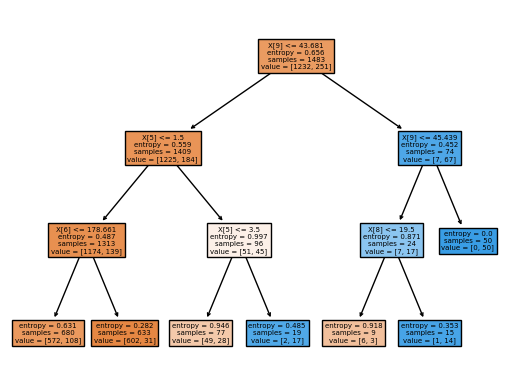

In [62]:
# Arbol con tamaño pequeño
plot_tree(clf,filled=True)

[Text(0.5769230769230769, 0.875, 'X[9] <= 43.681\nentropy = 0.656\nsamples = 1483\nvalue = [1232, 251]'),
 Text(0.3076923076923077, 0.625, 'X[5] <= 1.5\nentropy = 0.559\nsamples = 1409\nvalue = [1225, 184]'),
 Text(0.15384615384615385, 0.375, 'X[6] <= 178.661\nentropy = 0.487\nsamples = 1313\nvalue = [1174, 139]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.631\nsamples = 680\nvalue = [572, 108]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.282\nsamples = 633\nvalue = [602, 31]'),
 Text(0.46153846153846156, 0.375, 'X[5] <= 3.5\nentropy = 0.997\nsamples = 96\nvalue = [51, 45]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.946\nsamples = 77\nvalue = [49, 28]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.485\nsamples = 19\nvalue = [2, 17]'),
 Text(0.8461538461538461, 0.625, 'X[9] <= 45.439\nentropy = 0.452\nsamples = 74\nvalue = [7, 67]'),
 Text(0.7692307692307693, 0.375, 'X[8] <= 19.5\nentropy = 0.871\nsamples = 24\nvalue = [7, 17]'),
 Text(0.6923076923076923, 0.125, 'entro

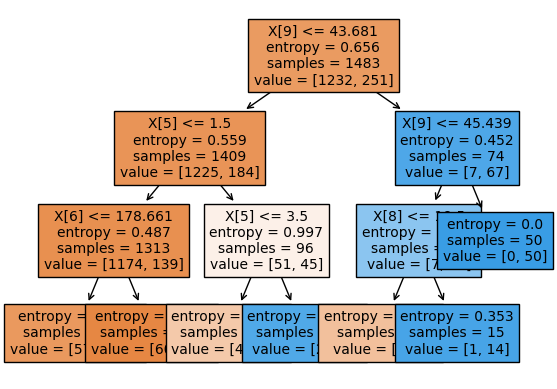

In [63]:
# Arbol con tamaño pequeño, para ello modifico el fontsize
plot_tree(clf,filled=True, fontsize=10)

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente fijar la semilla aleatoria para hacer repetible el experimento.

Evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:

* Accuracy
* Precision
* Recall
* F1
* matriz de confusión

In [64]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [106]:
# En todo esto supongo que hay repetirlo, es lo mismo de arriba y tambien hay que mostrarlo

# Conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
confusion_train = confusion_matrix(y_train, y_train_pred)

In [74]:
# Conjunto de evaluación
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

In [75]:
print("Conjunto de entrenamiento 'Exactitud'")
print(f'Train accuracy: {accuracy_train:0.2}')
print(f'Test accuracy: {accuracy_test:0.2}')

Conjunto de entrenamiento 'Exactitud'
Train accuracy: 1.0
Test accuracy: 0.89


In [83]:
print("Conjunto de entrenamiento 'Precisión'")
print(f'Train precision: {precision_train:0.2}')
print(f'Test precision: {precision_test:0.2}')

Conjunto de entrenamiento 'Precisión'
Train precision: 1.0
Test precision: 0.64


In [84]:
print("Conjunto de entrenamiento 'Recordar'")
print(f'Train precision: {recall_train:0.2}')
print(f'Test precision: {recall_test:0.2}')

Conjunto de entrenamiento 'Recordar'
Train precision: 1.0
Test precision: 0.62


In [85]:
print("Conjunto de entrenamiento 'F1'")
print(f'Train F1: {f1_train:0.2}')
print(f'Test F1: {f1_test:0.2}')

Conjunto de entrenamiento 'F1'
Train F1: 1.0
Test F1: 0.63


In [86]:
print("Conjunto de entrenamiento 'Matriz de confusión'")
print(f'Train confusion matriz: {confusion_train}')
print(f'Test confusion matriz: {confusion_test}')

Conjunto de entrenamiento 'Matriz de confusión'
Train confusion matriz: [[1232    0]
 [   0  251]]
Test confusion matriz: [[293  20]
 [ 22  36]]


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:

* Accuracy
* Precision
* Recall
* F1
* matriz de confusión

Documentación:

https://scikit-learn.org/stable/modules/grid_search.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [98]:
# Definir los valores de hiperparámetros para Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2]
}

# Con esto muestro los patametros, los recorro
for params in ParameterGrid(param_grid):
    print(params)

{'criterion': 'gini', 'max_depth': 1}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'entropy', 'max_depth': 1}
{'criterion': 'entropy', 'max_depth': 2}


In [88]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [89]:
cv = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2]},
             scoring='accuracy')

In [99]:
# Obtener los resultados de Grid Search
best_params = cv.best_params_

print(f'Mejores hipterparametros')
best_params

Mejores hipterparametros


{'criterion': 'gini', 'max_depth': 2}

In [100]:
best_score = cv.best_score_

print(f"Puntuación media con validación cruzada: {best_score}")

Puntuación media con validación cruzada: 0.8718877968877969


In [92]:
best_model = cv.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2, random_state=42)

In [93]:
y_train_pred = best_model.predict(X_train)
y_eval_pred = best_model.predict(X_test)

In [94]:
# Conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
confusion_train = confusion_matrix(y_train, y_train_pred)

In [97]:
# Conjunto de evaluación
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

In [101]:
print("Conjunto de entrenamiento 'Exactitud'")
print(f'Train accuracy: {accuracy_train:0.2}')
print(f'Test accuracy: {accuracy_test:0.2}')

Conjunto de entrenamiento 'Exactitud'
Train accuracy: 0.87
Test accuracy: 0.89


In [102]:
print("Conjunto de entrenamiento 'Recordar'")
print(f'Train precision: {recall_train:0.2}')
print(f'Test precision: {recall_test:0.2}')

Conjunto de entrenamiento 'Recordar'
Train precision: 0.26
Test precision: 0.62


In [103]:
print("Conjunto de entrenamiento 'F1'")
print(f'Train F1: {f1_train:0.2}')
print(f'Test F1: {f1_test:0.2}')

Conjunto de entrenamiento 'F1'
Train F1: 0.41
Test F1: 0.63


In [104]:
print("Conjunto de entrenamiento 'Matriz de confusión'")
print(f'Train confusion matriz: {confusion_train}')
print(f'Test confusion matriz: {confusion_test}')

Conjunto de entrenamiento 'Matriz de confusión'
Train confusion matriz: [[1228    4]
 [ 185   66]]
Test confusion matriz: [[293  20]
 [ 22  36]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d37d3883-05e9-47fe-a848-fe61d6ada027' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>